In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spamdetection/spam.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
sns.set_theme(context='notebook',
             style='whitegrid',
             palette='seismic',
             font='Lucida Calligraphy',
             font_scale=1.5,
             rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8,8]
matplotlib.rcParams.update({'font.size': 15})

In [4]:
data = pd.read_csv("/kaggle/input/spamdetection/spam.csv",encoding='latin-1')
print(data.head())

     c1                                                 c2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
data.shape
data.size

27860

In [6]:
data['c1'].value_counts()

c1
ham     4825
spam     747
Name: count, dtype: int64

Text(0.5, 1.0, 'c1')

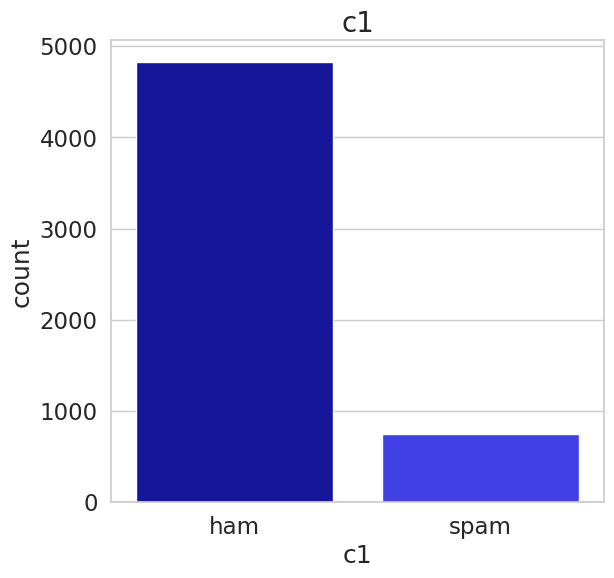

In [7]:
plt.figure(figsize=(14,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='c1', data= data)
plt.title("c1",fontsize=20)

In [8]:
# Remove missing values
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
# Remove duplicates
data = data.drop_duplicates(keep='first')

In [10]:
data.duplicated().sum()

0